### Reference:

1. https://www.opcito.com/blogs/extracting-text-from-images-with-tesseract-ocr-opencv-and-python
2. https://stackoverflow.com/questions/50951955/pytesseract-tesseractnotfound-error-tesseract-is-not-installed-or-its-not-i
3. https://www.youtube.com/watch?v=UxYJxcdLrs0&list=PL2VXyKi-KpYuTAZz__9KVl1jQz74bDG7i&index=3

In [1]:
# install pesseract for windowa as explained at the following link
# https://stackoverflow.com/questions/50951955/pytesseract-tesseractnotfound-error-tesseract-is-not-installed-or-its-not-i

### importing modules

In [2]:
# importing modules
import cv2
from PIL import Image

import pytesseract
from pytesseract import Output

from matplotlib import pyplot as plt
import numpy as np

from pdf2image import convert_from_path

pytesseract.pytesseract.tesseract_cmd = r'C:\Users\basharm\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

### Import image in PDF and save the image

In [3]:
pages = convert_from_path('index.pdf')

print(len(pages))

for count, page in enumerate(pages):
    page.save(f'index{count}.jpg', 'JPEG')

1


### Load image using PIL

In [4]:
img_file = 'index0.jpg'

11606118


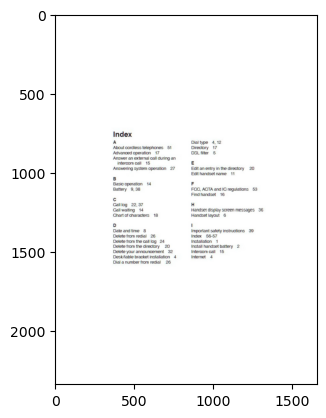

In [5]:
img = cv2.imread(img_file)
print(img.size)
plt.imshow(img)

In [6]:
base_image = img.copy()

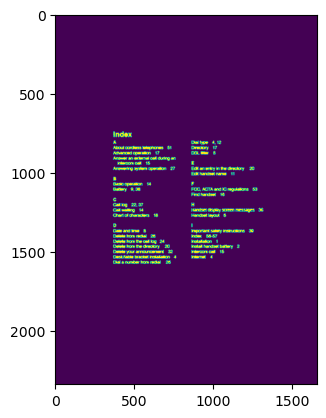

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

plt.imshow(thresh)

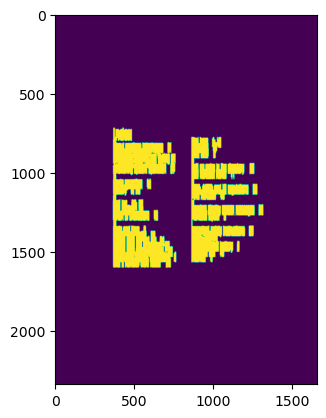

In [8]:
kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 50))
dilate = cv2.dilate(thresh, kernal, iterations=1)

plt.imshow(dilate)

In [9]:
cv2.imwrite("temp/sample_dilated.png", dilate)

True

In [10]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[1])

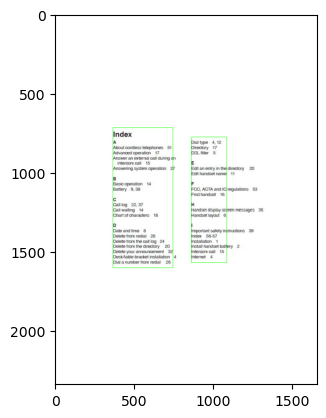

In [11]:
roi = []

for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    if h > 200 and w > 150:
        roi.append(base_image[y:y+h, x:x+w])
        cv2.rectangle(img, (x,y), (x+w, y+h), (36, 255, 12), 2)

cv2.imwrite("temp/sample_boxes.png", img)

plt.imshow(img)

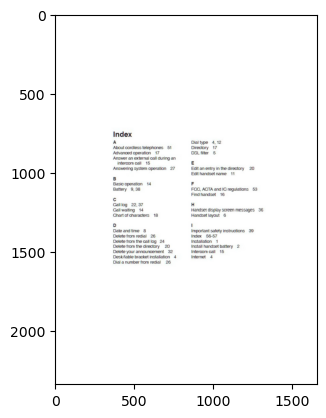

In [12]:
ocr_result_original = pytesseract.image_to_string(base_image)

plt.imshow(base_image)

In [13]:
print(ocr_result_original)

Index

A

About cordiess telephones 51

Advanced operation 17

Answer an external call during an
intercom call 15

Answering system operation 27

B
Basic operation 14
Battery 9,38

c

Galllog 22,37

Gall waiting 14
Ghart of characters 18

D

Date andtime 8

Delete from redial 26

Delete from the calllog 24
Delete from the directory 20
Delete your announcement 32
Desk/table bracket installation 4
Dial a number from redial 26

Dialtype 4, 12
Directory 17
DSL filter 5

E
Edit an entry in the directory 20
Edithandsetname 11

F
FGG, AGTA and IG regulations 53
Find handset 16

H

Handset display screen messages 36

Handset layout 6

I

Important safety instructions 39
Index 56-57

Installation 1

Install handset battery 2
Intercom call 15

Intemet 4



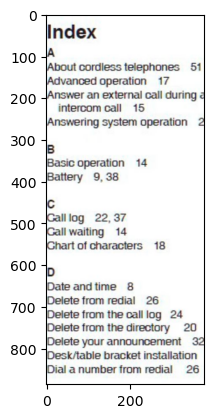

In [14]:
ocr_result_new = pytesseract.image_to_string(roi[0])
plt.imshow(roi[0])

In [15]:
print(ocr_result_new)

Index

A

About cordless telephones 51

Advanced operation 17

Answer an external call during a
intercom call 15

Answering system operation 2

B
Basic operation 14
Battery 9,38

c

Galllog 22, 37

Gall waiting 14
Ghart of characters 18

D

Date andtime 8

Delete from redial 26

Delete from the call log 24
Delete from the directory 20
Delete your announcement 32
Desk/table bracket installation
Dial a number from redial 26



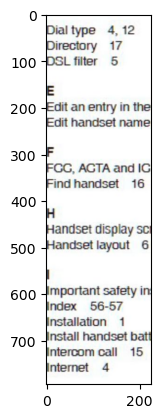

In [16]:
ocr_result_new = pytesseract.image_to_string(roi[1])
plt.imshow(roi[1])

In [17]:
print(ocr_result_new)

Dialtype 4, 12
Directory 17
DSL filter 5

E
Edit an entry in the
Edit handset name

F
FGG, AGTA and IG
Find handset 16

-
Handset display sc
Handset layout 6

l

Important safety in:
Index 56-57
Installation 1
Install handset batt
Intercom call 15
Internet 4

